In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
flight_data=pd.read_excel('Data_Train.xlsx')
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
##Checking the  columns and their corrosponding datatypes
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Data Cleaning

In [5]:


##checking for duplicate rows

flight_data.duplicated().sum()
    

220

In [6]:
##Dropping the duplicate rows keeping the first instance
flight_data.drop_duplicates(inplace=True)
flight_data.shape

(10463, 11)

In [7]:
##Checking for missing values
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
##Dropping rows that have missing values
flight_data.dropna(inplace=True)
flight_data.shape

(10462, 11)

In [9]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
### Exploratory data analysis

a=flight_data.Airline.value_counts().head()


In [11]:
a

Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Name: Airline, dtype: int64

In [12]:
import warnings
warnings.filterwarnings("ignore")

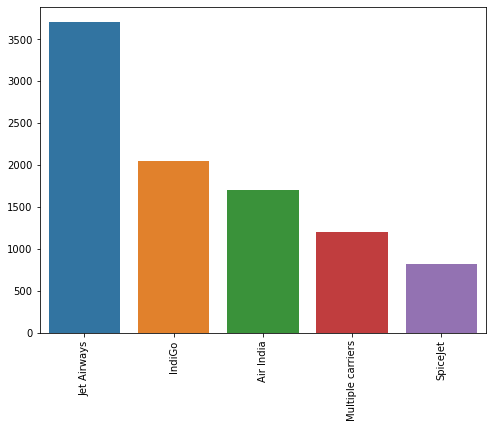

In [13]:
#visualizing the frequency of top 5  Airlines using sea-born

import seaborn as sns

import matplotlib.pylab as plt


plt.figure(figsize=(8,6))
# plot value_counts of Series
sns.barplot(a.index, a.values)

plt.xticks(rotation=90)
plt.savefig('barplot_airline.png',dpi=800,bbox_inches = 'tight')

In [14]:
flight_data.Duration.value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

## Data Transformation

In [15]:
###Extracting day of month,day of week  and month of Journey from date of journey

flight_data["day"] = pd.to_datetime(flight_data.Date_of_Journey, format="%d/%m/%Y").dt.day

flight_data["month"] = pd.to_datetime(flight_data.Date_of_Journey, format="%d/%m/%Y").dt.month
flight_data.month.head(9)

flight_data['day_of_week'] = pd.to_datetime(flight_data.Date_of_Journey, format="%d/%m/%Y").dt.day_name()
flight_data.day_of_week.head(5)

flight_data['Weekend']='No'

flight_data.head()

conditions = [
    (flight_data['day_of_week'] =='Sunday'),
    (flight_data['day_of_week']=='Saturday'),
    (flight_data['day_of_week']!='Saturday') & (flight_data['day_of_week']!='Sunday')
]
    
    
    

# create a list of the values we want to assign for each condition
values = ['Yes','Yes','No']

# create a new column and use np.select to assign values to it using our lists as arguments
flight_data['Weekend'] = np.select(conditions, values)

# display updated DataFrame
flight_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,day_of_week,Weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,Yes
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,No
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday,Yes
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday,Yes
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,Friday,No


In [16]:
##Dropping date_of_journey column

flight_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [17]:
##Extracting hours and minutes from arrival time

flight_data['arriv_hour']=pd.to_datetime(flight_data.Arrival_Time).dt.hour


flight_data['arriv_mins']=pd.to_datetime(flight_data.Arrival_Time).dt.minute
flight_data['arriv_mins'].head()


0    10
1    15
2    25
3    30
4    35
Name: arriv_mins, dtype: int64

In [18]:
##Extracting hours and minutes from arrival time

flight_data['dep_hour']=pd.to_datetime(flight_data.Dep_Time).dt.hour


flight_data['dep_mins']=pd.to_datetime(flight_data.Dep_Time).dt.minute
flight_data['dep_mins'].head()

0    20
1    50
2    25
3     5
4    50
Name: dep_mins, dtype: int64

In [19]:
##Dropping departure time and arrival time columns
flight_data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)


In [20]:
##Extracting duration hours and duration mins from duration column

duration = list(flight_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   
    
    

In [21]:
##Adding both the lists as columns to the dataframe and dropping the column duration

flight_data["Duration_hours"] = duration_hours
flight_data["Duration_mins"] = duration_mins


flight_data.drop(['Duration'],axis=1,inplace=True)








In [22]:
##Handling Categorical variables

flight_data.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

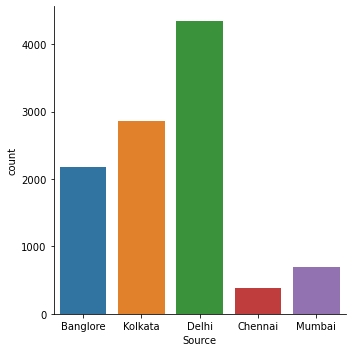

In [23]:

###Visualizing the frequency of categorical variables
sns.catplot(x="Source", kind="count", data=flight_data)


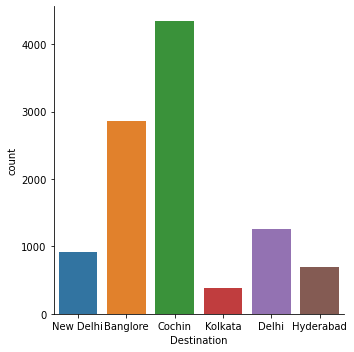

In [24]:
sns.catplot(x="Destination", kind="count", data=flight_data)

<Figure size 360x432 with 0 Axes>

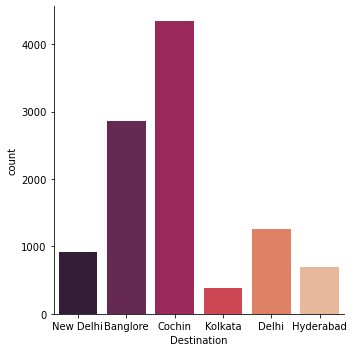

In [25]:
plt.figure(figsize=(5,6))
# plot value_counts of Series




sns.catplot(x="Destination", kind="count", palette="rocket", data=flight_data)

plt.savefig('barplot_destination.png',dpi=800,bbox_inches = 'tight')

## Dealing with categorical vairables

In [61]:


##Perform one hot enconding and create dataframe for each of the categorical variable

Airline = flight_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [62]:

Source = flight_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [63]:
Destination = flight_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [64]:
##For Total_stops variable we shall perform label enconding since it is an ordinal categorical variable

flight_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [65]:
flight_data.Total_Stops.replace({'non-stop':0,'2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,day_of_week,Weekend,arriv_hour,arriv_mins,dep_hour,dep_mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,Sunday,Yes,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,Wednesday,No,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,Sunday,Yes,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,Sunday,Yes,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,Friday,No,21,35,16,50,4,45


In [66]:
##Doing label encoding for weekend column

flight_data['Weekend'] = flight_data['Weekend'].replace({'Yes':1, 'No':0})

In [67]:
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,day_of_week,Weekend,arriv_hour,arriv_mins,dep_hour,dep_mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,Sunday,1,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,Wednesday,0,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,Sunday,1,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,Sunday,1,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,Friday,0,21,35,16,50,4,45


In [68]:
flight_data.Additional_Info.value_counts()


No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [69]:
##Dropping additional info since it has no info for 80% of rows 

##Dropping route since it does not provide any insight into price

flight_data.drop(['Additional_Info','Route'],axis=1,inplace=True)


In [70]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,day_of_week,Weekend,arriv_hour,arriv_mins,dep_hour,dep_mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,1,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,0,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,1,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,1,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,0,21,35,16,50,4,45


In [71]:
####Concating dataframes into the main dataframe

final_data= pd.concat([flight_data, Airline, Source, Destination], axis = 1)
final_data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,day_of_week,Weekend,arriv_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,1,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,0,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,1,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,1,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,0,21,...,0,0,0,0,0,0,0,0,0,1


In [72]:
### Dropping categorical variables such as airline,source,destination,total_stops

final_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [73]:
final_data.head()


,Total_Stops,Price,day,month,day_of_week,Weekend,arriv_hour,arriv_mins,dep_hour,dep_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,Sunday,1,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,Wednesday,0,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,Sunday,1,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,Sunday,1,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,Friday,0,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


## Test Set

In [77]:
test_data = pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [78]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

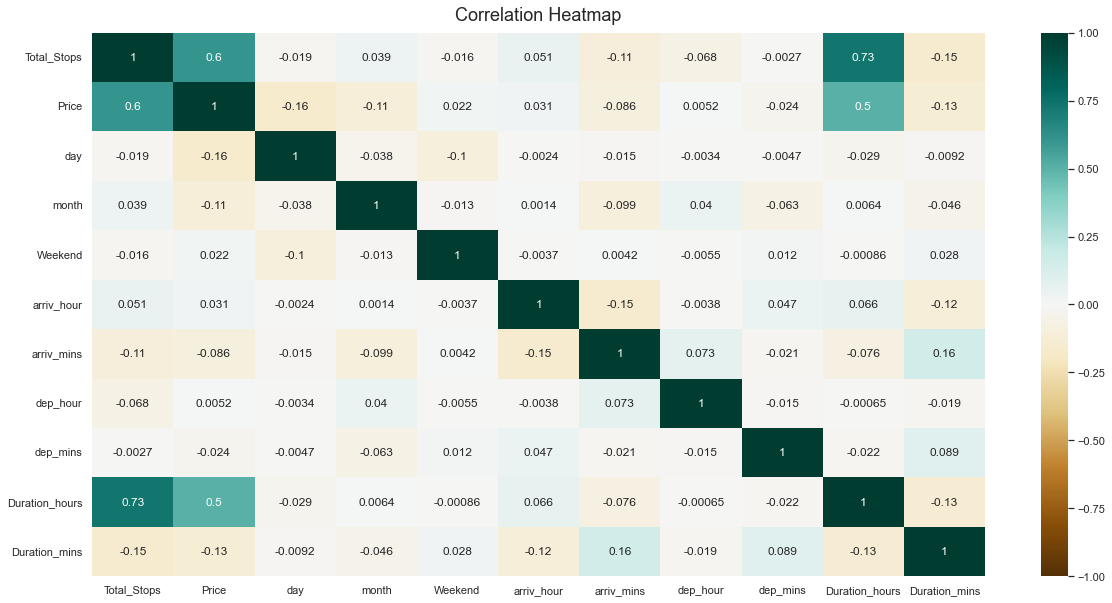

In [138]:
###In our dataset,price is the target variable and rest are the predictor variables

##Constructing the correlation heatmap to know which are the significant predictor variables

final_data.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(flight_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('correlation_map.png',dpi=900,bbox_inches = 'tight')

In [80]:

###Performing cross validation by splitting the data into training and test set


##Separating the target variable price from the rest of predictor variables

target=final_data[['Price']]
target.head()

final_data.drop(['Price'],axis=1,inplace=True)


In [81]:
final_data.drop(['day_of_week'],axis=1,inplace=True)

In [82]:
target.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


## Model Building and Evaluation

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_data,target,test_size=0.2)



In [94]:
X_train.shape

(8369, 30)

In [95]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,Y_train)

LinearRegression()

In [96]:
LR.score(X_test,Y_test)

0.6237350024206967

In [97]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(X_train, Y_train.values.ravel())

RandomForestRegressor()

In [98]:
model2.score(X_test,Y_test)

0.7488182713306148

In [102]:
y_pred = model2.predict(X_test)

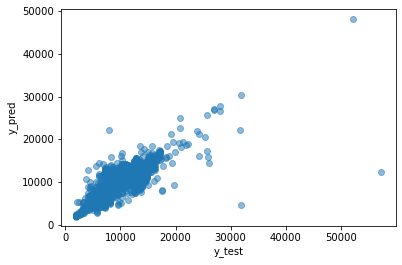

In [105]:
plt.scatter(Y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [110]:
from sklearn import metrics

In [111]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 1216.8787438779302
MSE: 4910979.370929206
RMSE: 2216.0729615536593


In [114]:
print("The coefficient of determination is",metrics.r2_score(Y_test, y_pred))

The coefficient of determination is 0.7488182713306148


## Hyperparamter Tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [117]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [119]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model2, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [121]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [122]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [123]:
prediction = rf_random.predict(X_test)

In [129]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1181.0969049178352
MSE: 4415480.26713246
RMSE: 2101.304420385695


In [135]:
print("The coefficient of determination is",metrics.r2_score(Y_test, prediction))

The coefficient of determination is 0.7741615505515675


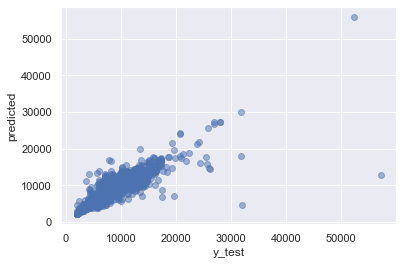

In [137]:
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("predicted")
plt.show()